In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei' #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [2]:
path='datas/household_power_consumption_1000.txt'

In [3]:
names = ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [4]:
df = pd.read_csv(path,sep=';')

In [5]:
# 读取数据前5行
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
# 数据清洗
new_df = df.replace('?',np.nan)
datas = new_df.dropna(how='any')
datas.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
# 时间格式化
def time_format(dt):
    import time
    t = time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return (t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

In [8]:
# 获取X,Y变量,将时间转换为数值型的连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(time_format(x)),axis=1)
Y = datas[names[2]]
print(X.head())
print(Y.head())

      0   1   2   3   4  5
0  2006  12  16  17  24  0
1  2006  12  16  17  25  0
2  2006  12  16  17  26  0
3  2006  12  16  17  27  0
4  2006  12  16  17  28  0
0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64


In [9]:
# 导入机器学习包
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# 训练集，测试集划分
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [12]:
# 训练模型
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# 模型检验
print('准确率：', lr.score(X_train,Y_train))

准确率： 0.24409311805909026


In [14]:
# 预测y值
y_predict = lr.predict(X_test)

In [15]:
# from sklearn.externals import joblib 产生警告
import joblib
# 模型保存
joblib.dump(ss, 'static/model/data_ss.model')
joblib.dump(lr, 'static/model/data_lr.model')
# 加载模型
joblib.load('static/model/data_ss.model')
joblib.load('static/model/data_lr.model')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

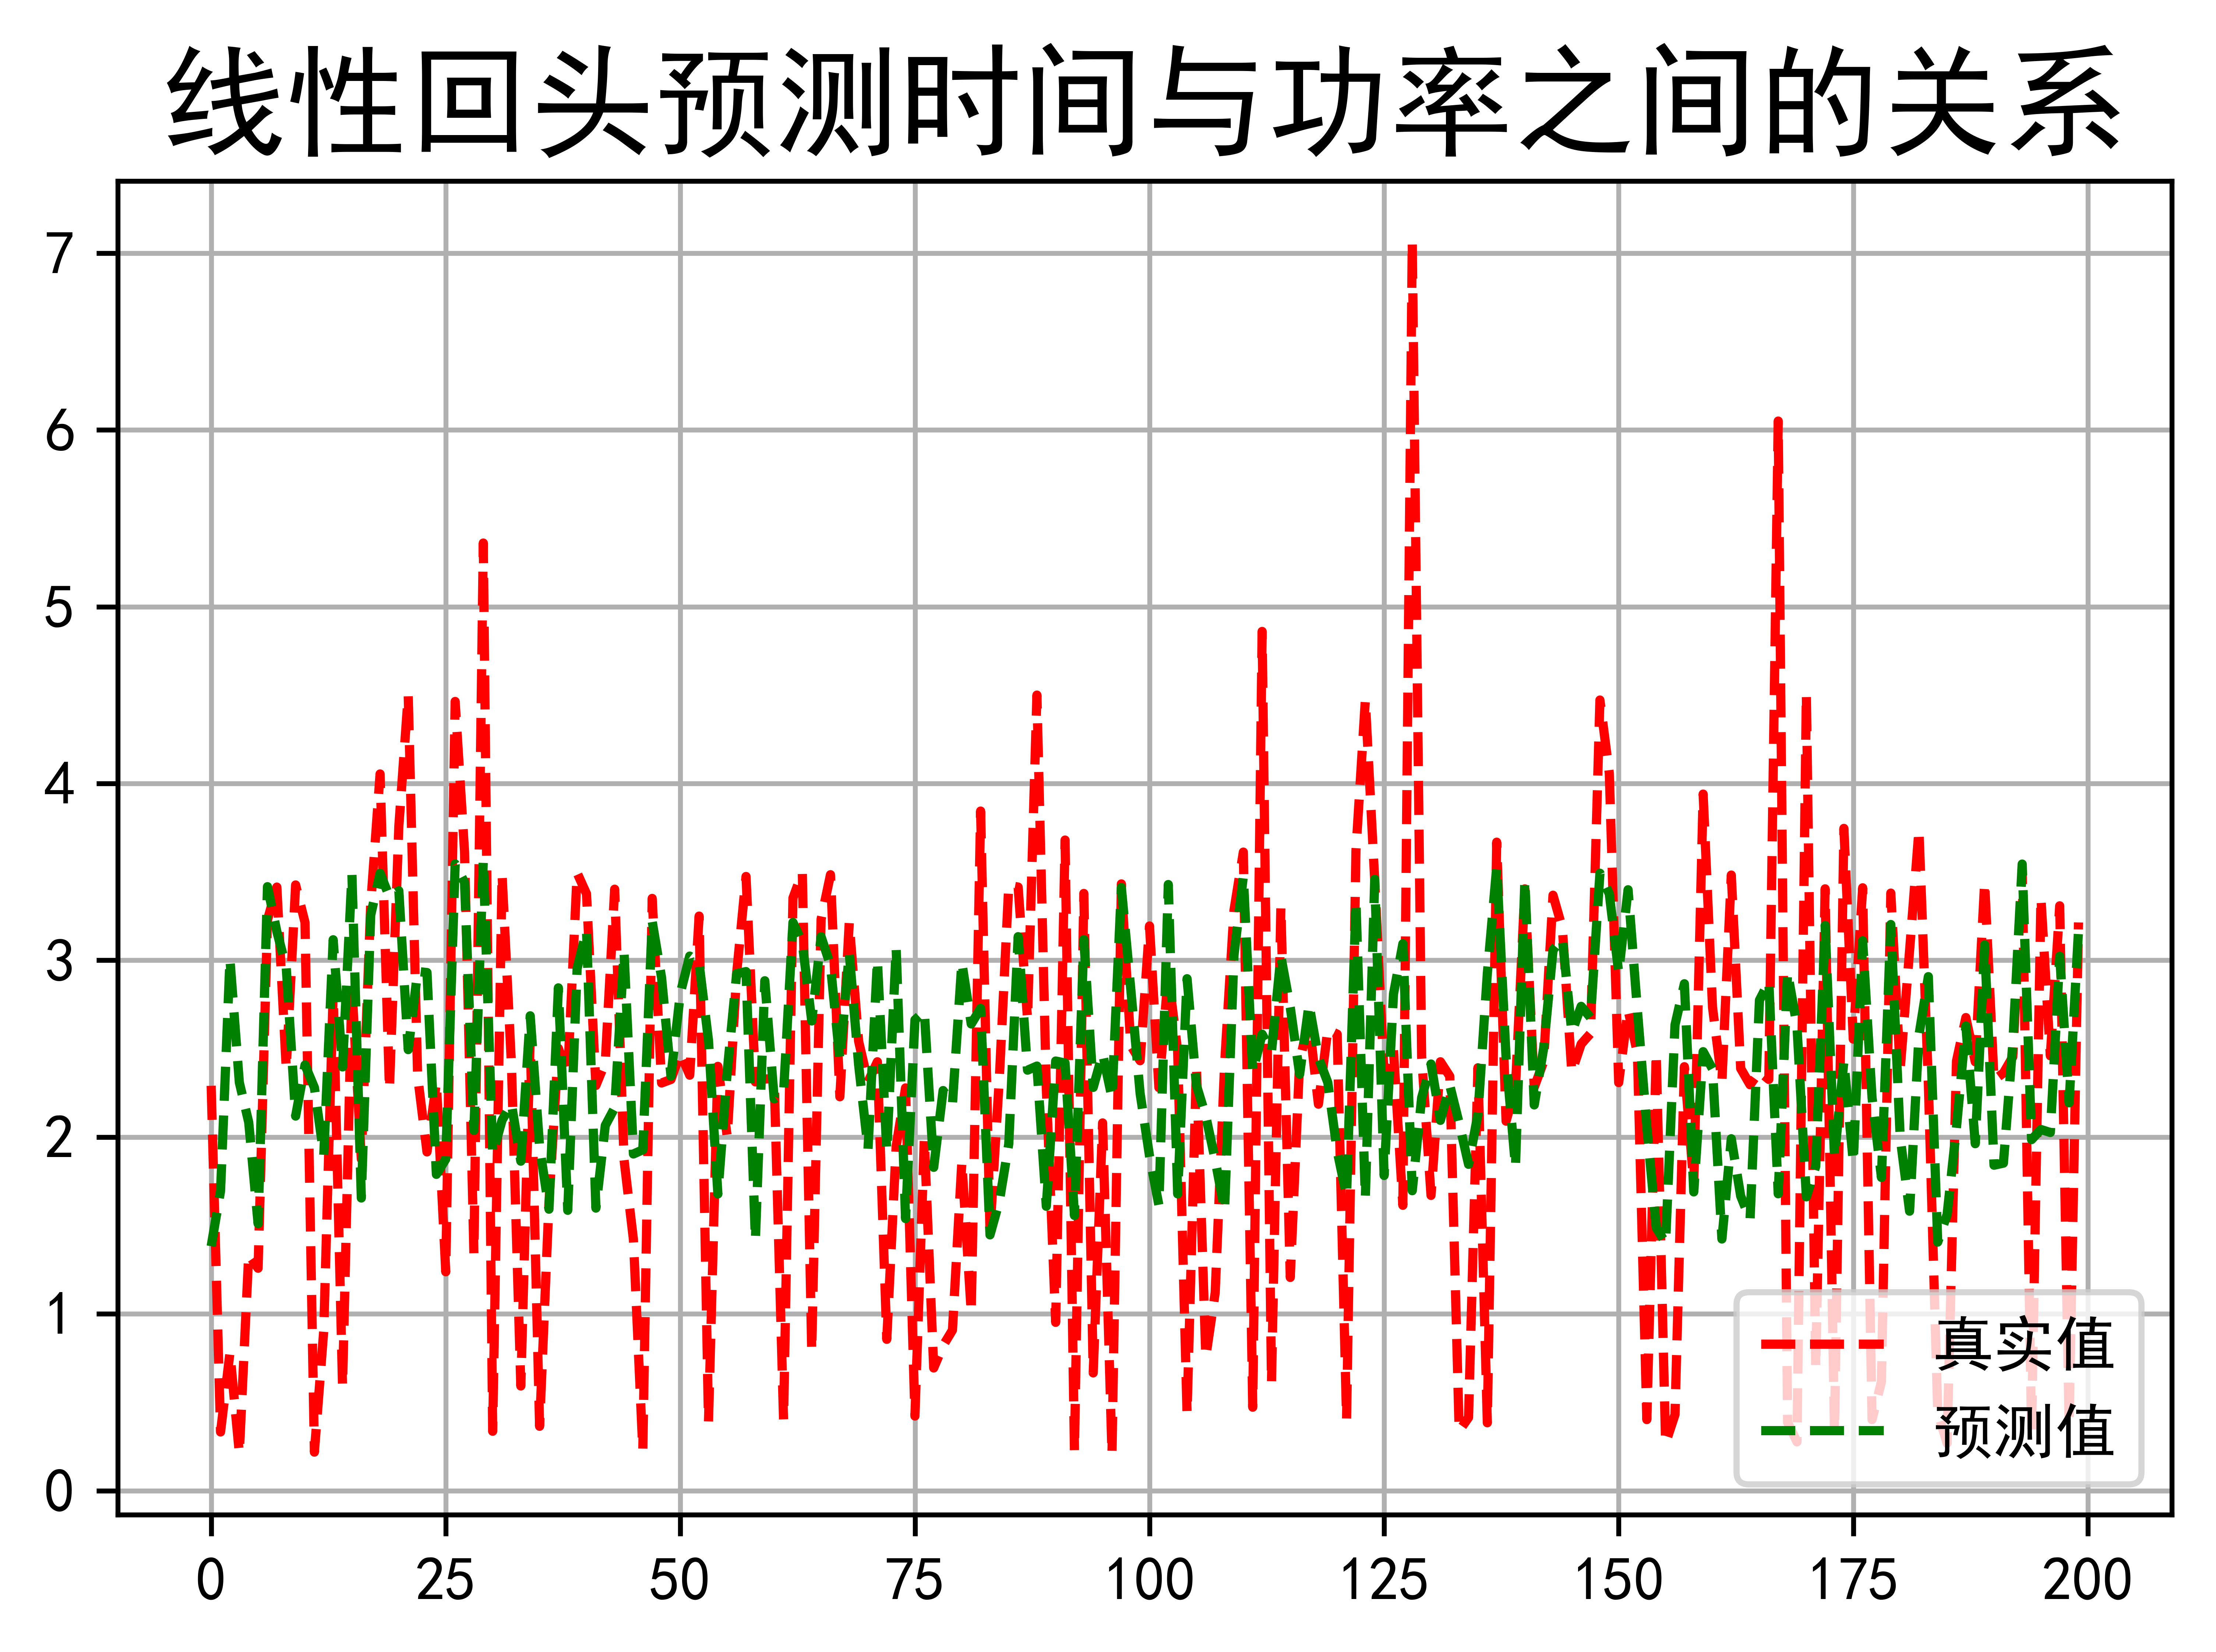

In [16]:
# 预测值与实际值画图比较
t = np.arange(len(X_test))
plt.figure(dpi=1200,facecolor='w')
plt.plot(t,Y_test,'r--',label='真实值')
plt.plot(t,y_predict,'g--',label='预测值')
plt.legend(loc='lower right')
plt.title(u'线性回头预测时间与功率之间的关系',fontsize=20)
plt.grid(b=True)
plt.savefig('test.png')
plt.show()